***도서 추천 데이터***   *https://dacon.io/competitions/official/236093/data*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/sample_data/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


### Data

**train.csv**
- ID : 샘플 고유 ID
- User-ID : 유저 고유 ID
- Book-ID : 도서 고유 ID
- 유저 정보
    - Age : 나이
    - Location : 지역
- 도서 정보
    - Book-Title : 도서 명
    - Book-Author : 도서 저자
    - Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    - Publisher : 출판사
    - Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)        
    (단, 0점인 경우에는 유저가 해당 도서에 관심이 없고 관련이 없는 경우)



**test.csv**
- ID : 샘플 고유 ID
- User-ID : 유저 고유 ID
- Book-ID : 도서 고유 ID
- 유저 정보
    - Age : 나이
    - Location : 지역
- 도서 정보
    - Book-Title : 도서 명
    - Book-Author : 도서 저자
    - Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
    - Publisher : 출판사

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159621 entries, 0 to 159620
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   159621 non-null  object 
 1   User-ID              159621 non-null  object 
 2   Book-ID              159621 non-null  object 
 3   Age                  159621 non-null  float64
 4   Location             159621 non-null  object 
 5   Book-Title           159621 non-null  object 
 6   Book-Author          159621 non-null  object 
 7   Year-Of-Publication  159621 non-null  float64
 8   Publisher            159621 non-null  object 
dtypes: float64(2), object(7)
memory usage: 11.0+ MB


### Book-Rating

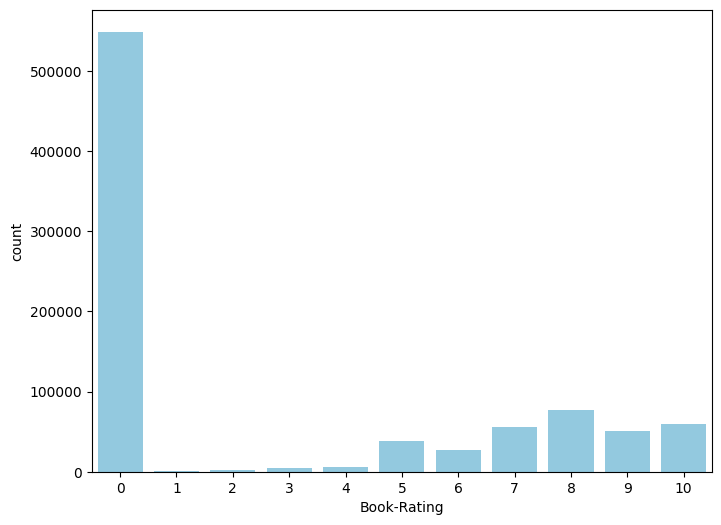

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=train['Book-Rating'], color='skyblue')
plt.xlabel('Book-Rating')
plt.show()

In [ ]:
train['Book-Rating'].value_counts()

0     548804
8      76971
10     60024
7      55852
9      50494
5      38416
6      26670
4       6462
3       4374
2       2019
1       1307
Name: Book-Rating, dtype: int64

### Age

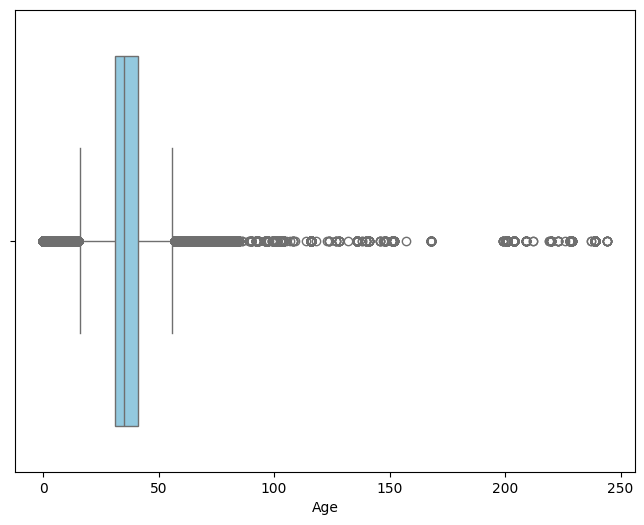

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Age'], color='skyblue')
plt.xlabel('Age')
plt.show()

In [ ]:
train['Age'].describe()

count    871393.000000
mean         36.799861
std          12.065509
min           0.000000
25%          31.000000
50%          35.000000
75%          41.000000
max         244.000000
Name: Age, dtype: float64

In [ ]:
mean_age = train[(train['Age'] >= 5) & (train['Age'] < 100)]['Age'].mean()
train.loc[(train['Age'] < 5) | (train['Age'] >= 100), 'Age'] = mean_age
train['Age'].describe()

count    871393.000000
mean         36.551535
std          10.323487
min           5.000000
25%          31.000000
50%          35.000000
75%          41.000000
max          99.000000
Name: Age, dtype: float64

In [ ]:
def categorize_age(age):
    # if age < 5 or age > 100:
    #     return 'error'
    if age < 10:
        return 'child'
    else:
        return str(age//10)[:-2] + '0s'

train['Age_Group'] = train['Age'].apply(categorize_age)
train['Age_Group'].value_counts()

30s      446293
20s      158672
40s      130747
50s       77540
10s       26385
60s       26248
70s        2703
child      1976
80s         585
90s         244
Name: Age_Group, dtype: int64

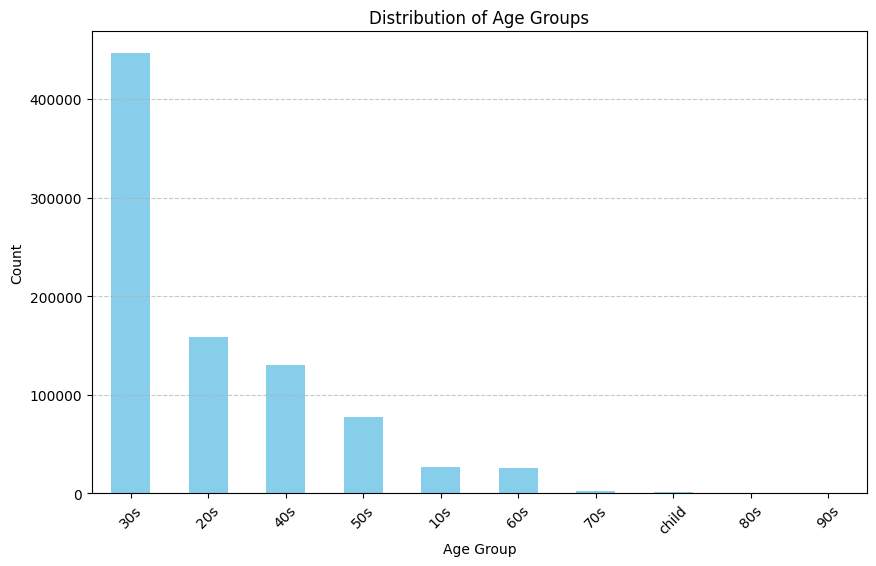

In [ ]:
age_group_counts = train['Age_Group'].value_counts()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Location

In [ ]:
location_split = train['Location'].str.split(',', n=2, expand=True)
train['City'] = location_split[0].str.strip()
train['State'] = location_split[1].str.strip()
train['Country'] = location_split[2].str.strip()

train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age_Group,City,State,Country
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,20s,sackville,new brunswick,canada
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,20s,sackville,new brunswick,canada
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,20s,sackville,new brunswick,canada
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,20s,sackville,new brunswick,canada
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,20s,sackville,new brunswick,canada


In [ ]:
train['City'].value_counts()

n/a                      13732
toronto                  12516
chicago                   7661
seattle                   7144
ottawa                    7108
                         ...  
remseck                      1
kardamili                    1
not sure                     1
sanur                        1
castiglion fiorentino        1
Name: City, Length: 13817, dtype: int64

In [ ]:
special_characters = r'[!@#$%^&*(0-9+),.?";:{}|<>/`]'
train['City'] = train['City'].str.replace(special_characters, '', regex=True)
train['City'] = train['City'].str.replace('-', '', regex=True)

train['City'].replace('na', 'toronto', inplace=True)
train['City'].replace('', 'toronto', inplace=True)
train['City'].replace('unknown', 'toronto', inplace=True)
train['City'] = train['City'].str.strip()

train.loc[train['City'].str.len() == 1, 'City'] = 'toronto'

In [ ]:
train['State'].value_counts()

california    91579
texas         36901
ontario       34633
missouri      28357
florida       28305
              ...  
pará              1
kunsan            1
setubal           1
rehka             1
nagasaki          1
Name: State, Length: 1810, dtype: int64

In [ ]:
special_characters = r'[!@#$%^&*(0-9+),.?";:{}|<>/`]'
train['State'] = train['State'].str.replace(special_characters, '', regex=True)
train['State'] = train['State'].str.replace('-', '', regex=True)

train['State'].replace('na', 'california', inplace=True)
train['State'].replace('', 'california', inplace=True)
train['State'].replace('unknown', 'california', inplace=True)
train['State'] = train['State'].str.strip()

train.loc[train['State'].str.len() == 1, 'State'] = 'california'

In [ ]:
train['Country'] = train['Country'].str.split(',').str[-1].str.strip()
train['Country'].value_counts()

usa                 630043
canada               78571
united kingdom       27050
germany              23471
                     21012
                     ...  
palau                    1
galiza neghra            1
macedonia                1
prince william           1
richmond country         1
Name: Country, Length: 244, dtype: int64

In [ ]:
special_characters = r'[!@#$%^&*(0-9+),.?";:{}|<>/`]'
train['Country'] = train['Country'].str.replace(special_characters, '', regex=True)
train['Country'] = train['Country'].str.replace('-', '', regex=True)

train['Country'].replace('na', 'usa', inplace=True)
train['Country'].replace('', 'usa', inplace=True)
train['Country'].replace('unknown', 'usa', inplace=True)
train['Country'] = train['Country'].str.strip()

train.loc[train['Country'].str.len() == 1, 'Country'] = 'usa'

### Year-Of-Publication

In [ ]:
train[train['Year-Of-Publication'] == -1]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age_Group,City,State,Country
184,TRAIN_000184,USER_00049,BOOK_121460,0,37.0,"gaylord, michigan, usa",Bxc Blue Bay Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc,30s,gaylord,michigan,usa
186,TRAIN_000186,USER_00049,BOOK_175661,10,37.0,"gaylord, michigan, usa",Lighthouse Mystery,Gertrude C Warner,-1.0,Scholastic Inc,30s,gaylord,michigan,usa
191,TRAIN_000191,USER_00049,BOOK_230275,0,37.0,"gaylord, michigan, usa",Mike's Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc,30s,gaylord,michigan,usa
231,TRAIN_000231,USER_00054,BOOK_122689,0,39.0,"spring, texas, usa",Charming Billy,Alice Mcdermott,-1.0,"Farrar, Straus Giroux",30s,spring,texas,usa
290,TRAIN_000290,USER_00060,BOOK_165427,0,27.0,"los angeles, california, usa",Moon Palace,Paul Auster,-1.0,Faber Faber Inc,20s,los angeles,california,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870700,TRAIN_870700,USER_92056,BOOK_093874,5,35.0,"leucadia, california, usa",High Ground,John Mcgahern,-1.0,Faber Faber Inc,30s,leucadia,california,usa
870751,TRAIN_870751,USER_92058,BOOK_117063,0,24.0,"halifax, nova scotia, canada",Hotel Du Lac,Anita Brookner,-1.0,Penguin Putnam~trade,20s,halifax,nova scotia,canada
870776,TRAIN_870776,USER_92058,BOOK_181486,8,24.0,"halifax, nova scotia, canada",Laurels Kitchen a Handbook for Vegetarian Co,Laurel Robertson,-1.0,Bantam Doubleday Dell,20s,halifax,nova scotia,canada
870895,TRAIN_870895,USER_92080,BOOK_045027,10,35.0,"brookhaven, mississippi, usa",Best of Sisters In Crime,Marilyn Wallace,-1.0,Penguin Putnam~childrens Hc,30s,brookhaven,mississippi,usa


In [ ]:
print(*sorted(train['Year-Of-Publication'].unique()))

-1.0 1376.0 1378.0 1806.0 1897.0 1900.0 1901.0 1902.0 1904.0 1906.0 1908.0 1909.0 1910.0 1911.0 1914.0 1917.0 1919.0 1920.0 1921.0 1922.0 1923.0 1924.0 1925.0 1926.0 1927.0 1928.0 1929.0 1930.0 1931.0 1932.0 1933.0 1934.0 1935.0 1936.0 1937.0 1938.0 1939.0 1940.0 1941.0 1942.0 1943.0 1944.0 1945.0 1946.0 1947.0 1948.0 1949.0 1950.0 1951.0 1952.0 1953.0 1954.0 1955.0 1956.0 1957.0 1958.0 1959.0 1960.0 1961.0 1962.0 1963.0 1964.0 1965.0 1966.0 1967.0 1968.0 1969.0 1970.0 1971.0 1972.0 1973.0 1974.0 1975.0 1976.0 1977.0 1978.0 1979.0 1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0 1987.0 1988.0 1989.0 1990.0 1991.0 1992.0 1993.0 1994.0 1995.0 1996.0 1997.0 1998.0 1999.0 2000.0 2001.0 2002.0 2003.0 2004.0 2005.0 2006.0 2008.0 2010.0 2011.0 2012.0 2020.0 2021.0


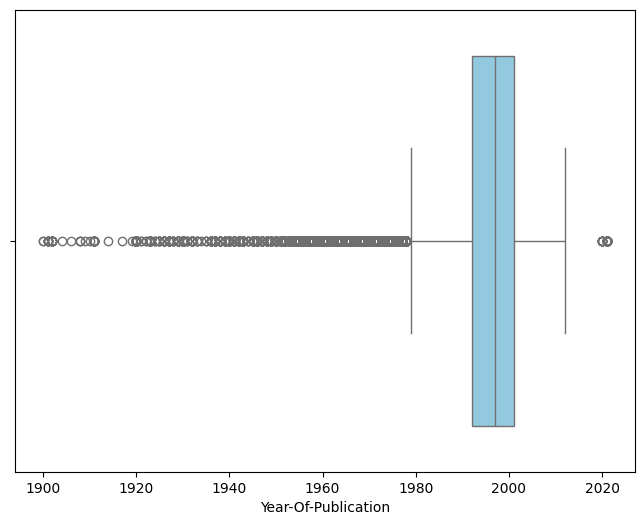

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train[train['Year-Of-Publication'] >= 1900]['Year-Of-Publication'], color='skyblue')
plt.xlabel('Year-Of-Publication')
plt.show()

In [ ]:
def categorize_year(year):
    if year < 1400: # year == -1:
        return 'None'
    else:
        return str(year//10)[:-2] + '0s'

train['Year_Group'] = train['Year-Of-Publication'].apply(categorize_year)

In [ ]:
train['Year_Group'].value_counts()

1990s    417970
2000s    289031
1980s    123469
1970s     23000
None      11517
1960s      3785
1950s      1921
1940s       262
1920s       176
1930s       136
2020s        59
1910s        28
1900s        25
2010s        12
1800s         1
1890s         1
Name: Year_Group, dtype: int64

### Book-Title

In [ ]:
train['Book-Title'].value_counts()

Wild Animus                                                                        2502
The Da Vinci Code                                                                   895
The Nanny Diaries: A Novel                                                          828
The Lovely Bones: A Novel                                                           768
A Painted House                                                                     761
                                                                                   ... 
Das Gesetz der Liebe. Inkl. CD.                                                       1
E- Mail an alle.                                                                      1
Enc/Brown/Saves/#7 (Encyclopedia Brown (Paperback))                                   1
Sitting Pretty                                                                        1
Creme De Colorado Cookbook (Celebrating Twenty Five Years of Culinary Artistry)       1
Name: Book-Title, Length: 217829

In [ ]:
import re

def subtitle(title):
    pattern = r'^(.*?)\s*\((.*?)\)$'

    mth = re.match(pattern, title)
    if mth:
        return mth.group(1), mth.group(2)
    else:
        return title, 'None'


train['Title'], train['Subtitle'] = zip(*train['Book-Title'].apply(subtitle))
train[['Title', 'Subtitle']]

,Title,Subtitle
0,Road Taken,None
1,Macbeth,New Penguin Shakespeare
2,Waverley,Penguin English Library
3,Mother Earth Father Sky,None
4,She Who Remembers,None
...,...,...
871388,Healing Words: The Power of Prayer and the Pra...,None
871389,The Salmon of Doubt: Hitchhiking the Galaxy On...,None
871390,Harry Potter and the Prisoner of Azkaban,Book 3
871391,Heartbreak Hill: Anatomy of a Ryder Cup,None


In [ ]:
train = train.drop(['Age', 'Location', 'Book-Title', 'Year-Of-Publication'], axis=1)
train

,ID,User-ID,Book-ID,Book-Rating,Book-Author,Publisher,Age_Group,City,State,Country,Year_Group,Title,Subtitle
0,TRAIN_000000,USER_00000,BOOK_044368,8,Rona Jaffe,Mira,20s,sackville,new brunswick,canada,2000s,Road Taken,None
1,TRAIN_000001,USER_00000,BOOK_081205,8,William Shakespeare,Penguin Books,20s,sackville,new brunswick,canada,1980s,Macbeth,New Penguin Shakespeare
2,TRAIN_000002,USER_00000,BOOK_086781,0,Walter Scott,Penguin Books,20s,sackville,new brunswick,canada,1980s,Waverley,Penguin English Library
3,TRAIN_000003,USER_00000,BOOK_098622,0,Sue Harrison,Avon,20s,sackville,new brunswick,canada,1990s,Mother Earth Father Sky,None
4,TRAIN_000004,USER_00000,BOOK_180810,8,Linda Lay Shuler,Signet Book,20s,sackville,new brunswick,canada,1980s,She Who Remembers,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,Larry Dossey,Harpercollins,30s,minneapolis,minnesota,usa,1990s,Healing Words: The Power of Prayer and the Pra...,None
871389,TRAIN_871389,USER_92097,BOOK_258124,0,DOUGLAS ADAMS,Harmony,30s,temple,texas,usa,2000s,The Salmon of Doubt: Hitchhiking the Galaxy On...,None
871390,TRAIN_871390,USER_92098,BOOK_071848,0,J. K. Rowling,Thorndike Press,40s,ottawa,ontario,canada,2000s,Harry Potter and the Prisoner of Azkaban,Book 3
871391,TRAIN_871391,USER_92099,BOOK_252599,8,Tim Rosaforte,St Martins Pr,40s,maple grove,minnesota,usa,1990s,Heartbreak Hill: Anatomy of a Ryder Cup,None


In [ ]:
train.reset_index(inplace=True)

In [ ]:
train.to_csv('new_train.csv', index=False)